<a href="https://colab.research.google.com/github/mostafadentist/python-ipynb/blob/main/Orthogonality_and_Projections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

u = np.array([1, 2])
v = np.array([-2, 1])

dot = np.dot(u, v)
print("u · v =", dot)

if dot == 0:
    print("u and v are orthogonal")
else:
    print("u and v are not orthogonal")

u · v = 0
u and v are orthogonal


In [2]:
u = np.array([1, 0])
v = np.array([0, 1])

print("u · v =", np.dot(u, v))
print("Norm of u =", np.linalg.norm(u))
print("Norm of v =", np.linalg.norm(v))

u · v = 0
Norm of u = 1.0
Norm of v = 1.0


In [3]:
a = np.array([3, 4])
b = np.array([1, 2])

# Projection of a onto b
proj_ab = (np.dot(a, b) / np.dot(b, b)) * b
print("Projection of a onto b =", proj_ab)

Projection of a onto b = [2.2 4.4]


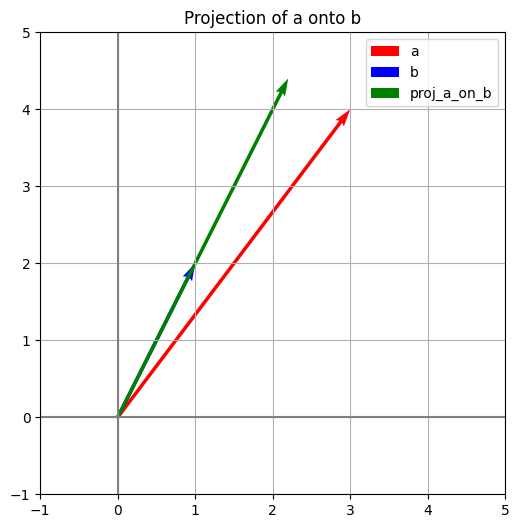

In [4]:
import matplotlib.pyplot as plt

a = np.array([3, 4])
b = np.array([1, 2])

proj_ab = (np.dot(a, b) / np.dot(b, b)) * b

plt.figure(figsize=(6,6))
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')

plt.quiver(0,0,a[0],a[1],angles='xy',scale_units='xy',scale=1,color='r',label='a')
plt.quiver(0,0,b[0],b[1],angles='xy',scale_units='xy',scale=1,color='b',label='b')
plt.quiver(0,0,proj_ab[0],proj_ab[1],angles='xy',scale_units='xy',scale=1,color='g',label='proj_a_on_b')

plt.xlim(-1,5)
plt.ylim(-1,5)
plt.legend()
plt.title("Projection of a onto b")
plt.grid(True)
plt.show()

In [5]:
# Project y onto span{u1, u2}
U = np.array([[1, 0],
              [0, 1],
              [1, 1]])  # basis vectors stacked in columns

y = np.array([2, 1, 3])

# Projection matrix: P = U (U^T U)^(-1) U^T
P = U @ np.linalg.inv(U.T @ U) @ U.T
proj_y = P @ y

print("Projection of y onto span(U):", proj_y)

Projection of y onto span(U): [2. 1. 3.]


In [6]:
def gram_schmidt(V):
    U = []
    for v in V:
        u = v.copy()
        for u_prev in U:
            u -= np.dot(u, u_prev) / np.dot(u_prev, u_prev) * u_prev
        U.append(u)
    return np.array(U)

V = np.array([[1,1,0], [1,0,1], [0,1,1]], dtype=float)
U = gram_schmidt(V)

print("Original vectors:\n", V)
print("Orthogonalized vectors:\n", U)

Original vectors:
 [[1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]]
Orthogonalized vectors:
 [[ 1.          1.          0.        ]
 [ 0.5        -0.5         1.        ]
 [-0.66666667  0.66666667  0.66666667]]


In [7]:
# Overdetermined system: Ax ≈ b
A = np.array([[1,1],
              [1,2],
              [1,3]])
b = np.array([1,2,2])

# Least squares solution: x = (A^T A)^(-1) A^T b
x_ls = np.linalg.inv(A.T @ A) @ A.T @ b

print("Least squares solution:", x_ls)

Least squares solution: [0.66666667 0.5       ]
